<img src=".\images\Logo.png" width=150 align="left" /> <img src=".\images\Logo2.jpg" width=450 align="right" />


# <center><font color= #1e8449 > <b>CUxx_Nombre del caso de uso</font></center>

<font color='steelblue'><b>Citizenlab Data Science Methodology > II - Data Processing Domain </font>
***
> # <font color='steelblue'> <b>10.- Imbalanced Analysis</font>

<font color='steelblue'>Data Balancing is the process to obtain an adequate data balance if is required, in order to have the adequate amount of data that reflects the intrinsic structure of the problem to be solved.</font>

## <font color='steelblue'>Tasks</font>

<font color='steelblue'><b>Imbalanced Analysis</b>	
    
<font color='steelblue'><b>Evaluate Imbalanced Classification Models</b>
    
<font color='steelblue'><b>Select appropiate metrics</b>
    
<font color='steelblue'><b>Data Balancing</b>
    
- Undersampling the Majority Class
- Oversampling the Minority Class
- Mix under-oversampling
- Evaluate a model with random oversampling and undersampling
    
<font color='steelblue'><b>Cost-Sensitive Algorithms</b>



## <font color='green'>File</font>

- <font color='steelblue'> <b>Input File: xxxxxxxxxx</font>
- <font color='steelblue'> <b>Output File: xxxxxxxxxx</font>

## <font color='green'>Settings</font>

In [1]:
# Libraries to use
import os
from pathlib import Path
import pandas as pd
import easygui as GUI
from matplotlib import pyplot as plt
import seaborn as sn

## <font color='green'>Data Load</font>

<font color='tomato'><b> OPCION A:</b> Uso de la librería "easygui" para mayor comodidad</font>

In [2]:
# Data load using "easygui" library
file_data=GUI.fileopenbox(title='Open Data File', default="Data/Input/", filetypes="*.*")

<font color='tomato'>Utilizamos en todos los notebooks SIEMPRE <b>data</b> como nombre de la matriz (dataframe) principal donde cargamos los datos.</font>

In [2]:
# Data file to dataframe
data = pd.read_csv(file_data)

NameError: name 'pd' is not defined

In [3]:
data.head()

NameError: name 'data' is not defined

<font color='tomato'><b> OPCION B:</b> Directamente</font>

In [2]:
file_name='diabetes.csv'
data = pd.read_csv('Data/Input/'+file_name)

<font color='tomato'>Visualizo los datos.</font>

In [1]:
data

NameError: name 'data' is not defined

## Imbalanced Analysis

In [7]:
from sklearn.model_selection import train_test_split
data_trans = data.values
# separate into input and output columns
X = data_trans[:, :-1]
y = data_trans[:, -1]
# separate into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (339, 13) (339,)
Test (167, 13) (167,)


In [11]:
data.head()

,Class_0,Class_1,Target
0,2.403627,1.657997,0
1,0.386701,0.899955,0
2,-0.557171,0.510338,0
3,0.507216,1.070000,0
4,-0.940899,0.703370,0


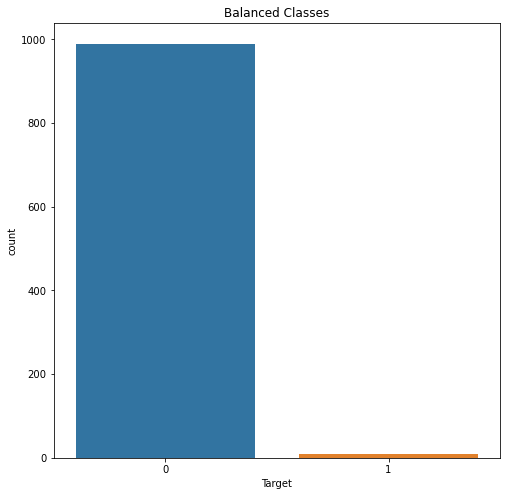

In [9]:
# Visualizando los datos para comprobar como de balanceados están
Target=data.Target
plt.figure(figsize=(4, 4))
sn.countplot(Target, data=data)
plt.title('Balanced Classes')
plt.show()

In [15]:
# summarize class distribution
from collections import Counter
counter = Counter(data.Target)
print(counter)

Counter({0: 990, 1: 10})


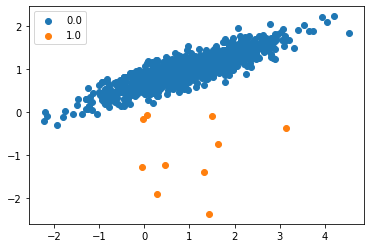

In [17]:
# Generate and plot imbalanced classification dataset
from collections import Counter
from matplotlib import pyplot
from numpy import where
# summarize class distribution
counter = Counter(y)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

## Evaluate Imbalanced Classification Models

In [9]:
from sklearn.model_selection import train_test_split
data_trans = data.values
# separate into input and output columns
X = data_trans[:, :-1]
y = data_trans[:, -1]
# separate into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)# evaluate imbalanced classification model with different metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# define model
model = LogisticRegression(solver='liblinear')

# fit model
model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y_test, yhat))
print('Precision: %.3f' % precision_score(y_test, yhat))
print('Recall: %.3f' % recall_score(y_test, yhat))
print('F-measure: %.3f' % f1_score(y_test, yhat))

Accuracy: 0.996
Precision: 1.000
Recall: 0.600
F-measure: 0.750


## Undersampling the Majority Class

In [11]:
# example of undersampling the majority class
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_under))

Counter({0.0: 20, 1.0: 10})


In [19]:
# Generate new data set
new_data=pd.concat([pd.DataFrame(X_under), pd.DataFrame(y_under)], axis=1)
new_data.columns=data.columns
data=new_data
data.head()

,Class_0,Class_1,Target
0,0.919892,0.803475,0.0
1,0.566852,1.043284,0.0
2,2.100244,1.502344,0.0
3,1.822636,1.179315,0.0
4,0.907664,0.984432,0.0


In [20]:
print(data.shape)

(30, 3)


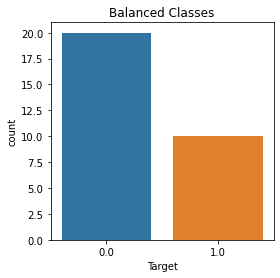

In [22]:
# Visualizando los datos para comprobar como de balanceados están
Target=data.Target
plt.figure(figsize=(4, 4))
sn.countplot(Target, data=data)
plt.title('Balanced Classes')
plt.show()

## Oversampling the Minority Class

In [8]:
# example of oversampling the minority class
from collections import Counter
from imblearn.over_sampling import SMOTE
# define oversample strategy
oversample = SMOTE(sampling_strategy=0.5)
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({0.0: 990, 1.0: 495})


In [10]:
# Generate new data set
new_data=pd.concat([pd.DataFrame(X_over), pd.DataFrame(y_over)], axis=1)
new_data.columns=data.columns
data=new_data
data.head()

,Class_0,Class_1,Target
0,2.403627,1.657997,0.0
1,0.386701,0.899955,0.0
2,-0.557171,0.510338,0.0
3,0.507216,1.070000,0.0
4,-0.940899,0.703370,0.0


In [11]:
print(data.shape)

(1485, 3)


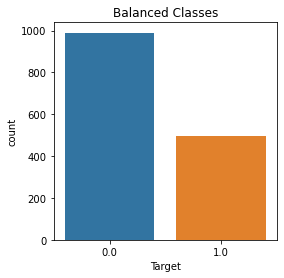

In [12]:
# Visualizando los datos para comprobar como de balanceados están
Target=data.Target
plt.figure(figsize=(4, 4))
sn.countplot(Target, data=data)
plt.title('Balanced Classes')
plt.show()

## Combine Data Undersampling and Oversampling with SMOTEENN

In [9]:
# example of both undersampling and oversampling
from collections import Counter
from imblearn.combine import SMOTEENN
# define sampling strategy
sample = SMOTEENN(sampling_strategy=0.5)
# fit and apply the transform
X_smoo, y_smoo = sample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_smoo))

Counter({0.0: 990, 1.0: 495})


In [10]:
# Generate new data set
new_data=pd.concat([pd.DataFrame(X_smoo), pd.DataFrame(y_smoo)], axis=1)
new_data.columns=data.columns
data=new_data
data.head()

,Class_0,Class_1,Target
0,2.403627,1.657997,0.0
1,0.386701,0.899955,0.0
2,-0.557171,0.510338,0.0
3,0.507216,1.070000,0.0
4,-0.940899,0.703370,0.0


In [11]:
print(data.shape)

(1485, 3)


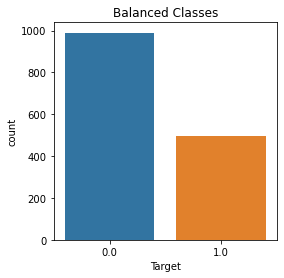

In [12]:
# Visualizando los datos para comprobar como de balanceados están
Target=data.Target
plt.figure(figsize=(4, 4))
sn.countplot(Target, data=data)
plt.title('Balanced Classes')
plt.show()

## Evaluating a model with random oversampling and undersampling

In [ ]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# define pipeline
over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under), ('m', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

## Cost-Sensitive Algorithms

In [14]:
# example of cost sensitive logistic regression for imbalanced classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
# define model
model = LogisticRegression(solver='liblinear', class_weight='balanced')
# fit model
model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
print('F-Measure: %.3f' % f1_score(y_test, yhat))

F-Measure: 0.625


## <font color='green'>Data Save</font>

<font color='tomato'> Identificamos los datos a guardar</font>

In [7]:
data_to_save = data

<font color='tomato'>Extensión añadida al nombre del fichero: será el número del proceso que lo genera (e.g. diabetes_06).</font>

<font color='tomato'>En caso de generarse varios ficheros llevarán _01 _02 ... después (e.g. diabetes_06_01).</font>

In [1]:
# Proceso10
extension='10'

<font color='tomato'><b> OPCION A:</b> Uso de la librería "easygui" para mayor comodidad</font>

In [11]:
# Guardamos el fichero
file_save=basename(file_data).replace('.csv',extension+'.csv')
path_save="Data/Output/"+file_save
path_out=GUI.filesavebox(title='Save Data File',default=path_save)
data_to_save.to_csv(path_out, index=False)
print('Falie saved as:')
path_out

Falie saved as:


<font color='tomato'><b> OPCION B:</b> Uso del código que va a Pilot Deploy</font>

In [10]:
file_save=basename(file_name).replace('.csv',extension+'.csv')
data_to_save.to_csv('Data/Output/' + file_save, index=False)

## <font color='#2874a6'>REPORT</font>

A continuación se realizará un informe de las acciones realizadas

## <font color=' #2874a6 '>Main Actions Carried Out</font>

Ejemplos
- Se han modificado los nombres de las columnas
- Se han eliminado blancos en los nombres de las columnas
- Se han traducido los nombres de las columnas

## <font color=' #2874a6 '>Main Conclusions</font>

Ejemplos
- Los nombre de las columnas de origen son muy largos lo que provoca que ...
- ......

## <font color='RED'>CODE TO DEPLOY</font>

A continuación se incluirá el código que deba ser llevado a despliegue para producción, dado que se entiende efectúa operaciones necesarias sobre los datos en la ejecución del prototipo

<font color=' red '><b>Description</b></font>

- xxxxxx
- xxxxxx
- xxxxxx

<font color=' red '><b>CODE</b></font>

In [1]:
# 
